In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, pairwise_distances_argmin_min
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

<h1> Load countries data

In [191]:
df = pd.read_csv('../dataset/Country-data.csv', sep=',', decimal='.')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<h1> Check data

In [192]:
df.shape

(167, 10)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [194]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<h1> Checking dataset value range

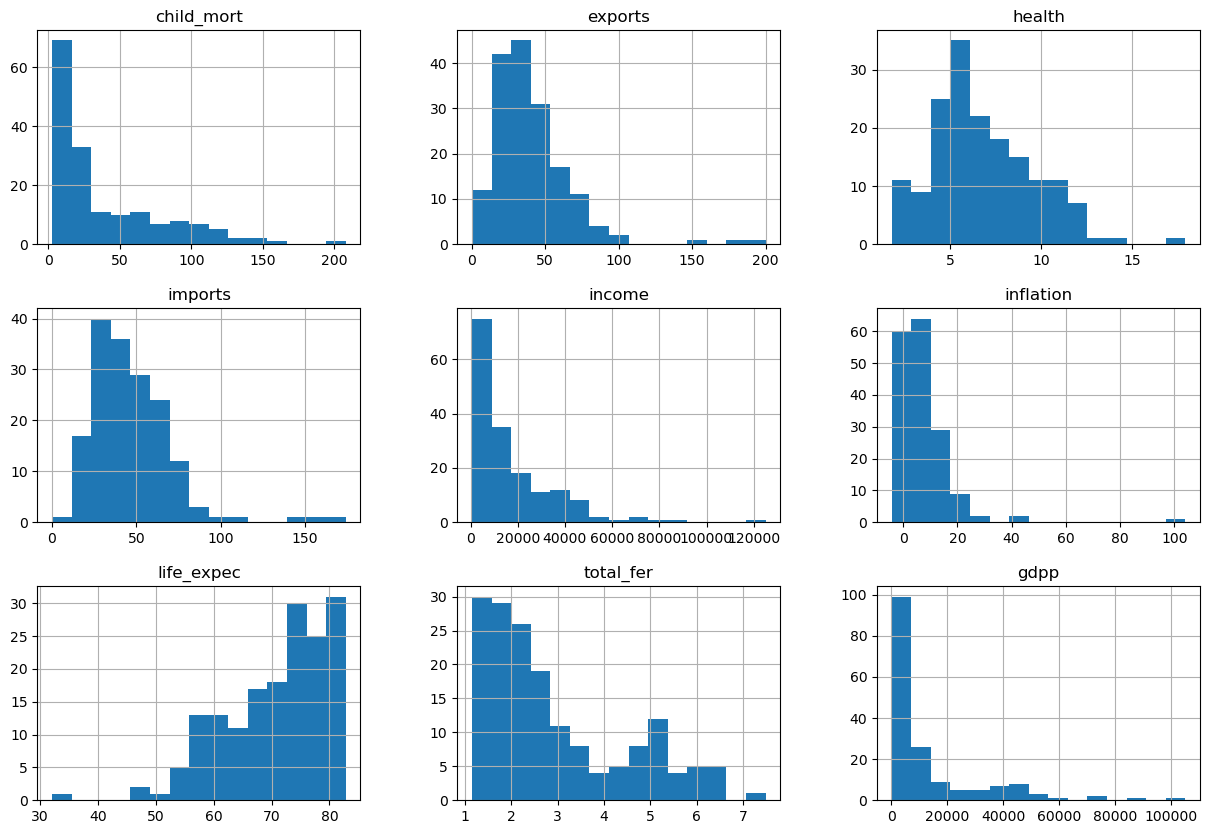

In [195]:
df.hist(figsize=(15, 10), bins=15)
plt.show()

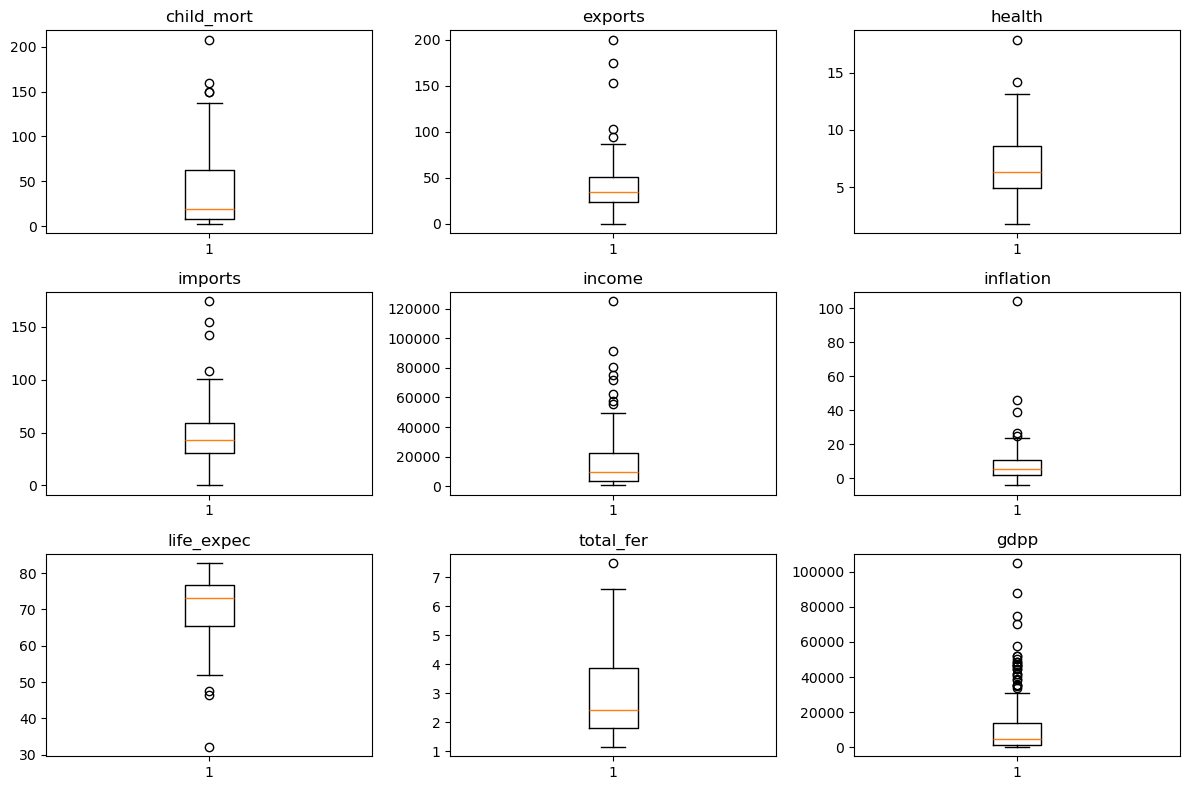

In [196]:
num_cols = df.select_dtypes(include=['number']).columns

num_cols = df.select_dtypes(include=['number']).columns
num_plots = len(num_cols)  # Get the number of numerical columns

rows = (num_plots // 3) + (num_plots % 3 > 0)  # Integer division and remainder check
cols = min(3, num_plots)  # Ensure at most 3 columns

# # Create the figure and subplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i+1)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

<h1> Prepare dataset

In [197]:

features = df.drop(['country'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [198]:
k_cluster = 3
kmeans = KMeans(n_clusters=k_cluster,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, y_kmeans)
print(f"Silhouette Score for k:{k_cluster} = {silhouette_avg}")
y_kmeans

Silhouette Score for k:3 = 0.28329575683463126


array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [199]:
kmeans_countries_df = df.copy()
kmeans_countries_df['cluster'] = kmeans.labels_
kmeans_countries_df[['country', 'cluster']].head(10)

,country,cluster
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,Angola,1
4,Antigua and Barbuda,0
5,Argentina,0
6,Armenia,0
7,Australia,2
8,Austria,2
9,Azerbaijan,0


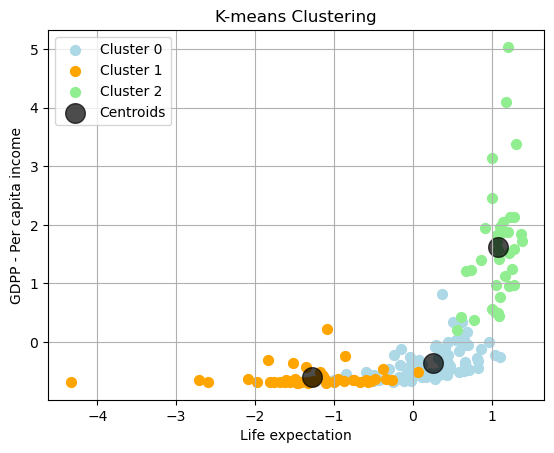

In [200]:
centers = kmeans.cluster_centers_

# Cluster colors
colors = ['lightblue', 'orange', 'lightgreen']

# Plot each cluster with a specific color and label
for cluster in range(k_cluster):
    plt.scatter(scaled_data[y_kmeans == cluster, 6], scaled_data[y_kmeans == cluster, 8], 
                color=colors[cluster], s=50, label=f'Cluster {cluster}')

plt.title("K-means Clustering")
plt.xlabel('Life expectation')
plt.ylabel('GDPP - Per capita income')

# Plot centroids
plt.scatter(centers[:, 6], centers[:, 8], c='black', s=200, alpha=0.7, label='Centroids')

# Display the legend
plt.legend()
plt.grid(True)
plt.show()

In [201]:
closest, _ = pairwise_distances_argmin_min(centers, scaled_data)

# Get countries that are closest to centroids
closest_countries = kmeans_countries_df.iloc[closest]['country'].tolist()
print('Countries closest to centroid:')
for country in closest_countries:
  value = kmeans_countries_df.loc[kmeans_countries_df['country'] == country]
  print(value)


Countries closest to centroid:
    country  child_mort  exports  health  imports  income  inflation  \
76  Jamaica        18.1     31.3    4.81     49.6    8000       9.81   

    life_expec  total_fer  gdpp  cluster  
76        74.7       2.17  4680        0  
   country  child_mort  exports  health  imports  income  inflation  \
63  Guinea       109.0     30.3    4.93     43.2    1190       16.1   

    life_expec  total_fer  gdpp  cluster  
63        58.0       5.34   648        1  
    country  child_mort  exports  health  imports  income  inflation  \
68  Iceland         2.6     53.4     9.4     43.3   38800       5.47   

    life_expec  total_fer   gdpp  cluster  
68        82.0        2.2  41900        2  


Silhouette Score for K=3: 0.2833


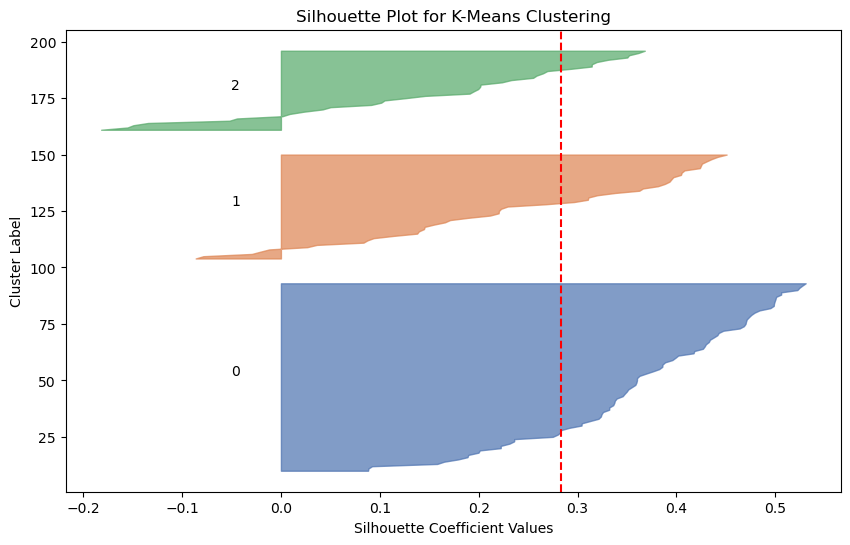

In [202]:
# Calculate Silhouette Score for the optimal K
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score for K={k_cluster}: {silhouette_avg:.4f}')

# Detailed Silhouette Analysis
sample_silhouette_values = silhouette_samples(scaled_data, kmeans.labels_)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(k_cluster):
    # Aggregate the silhouette scores for samples in cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = sns.color_palette("deep")[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.show()

<h1>Agglomerative Clustering

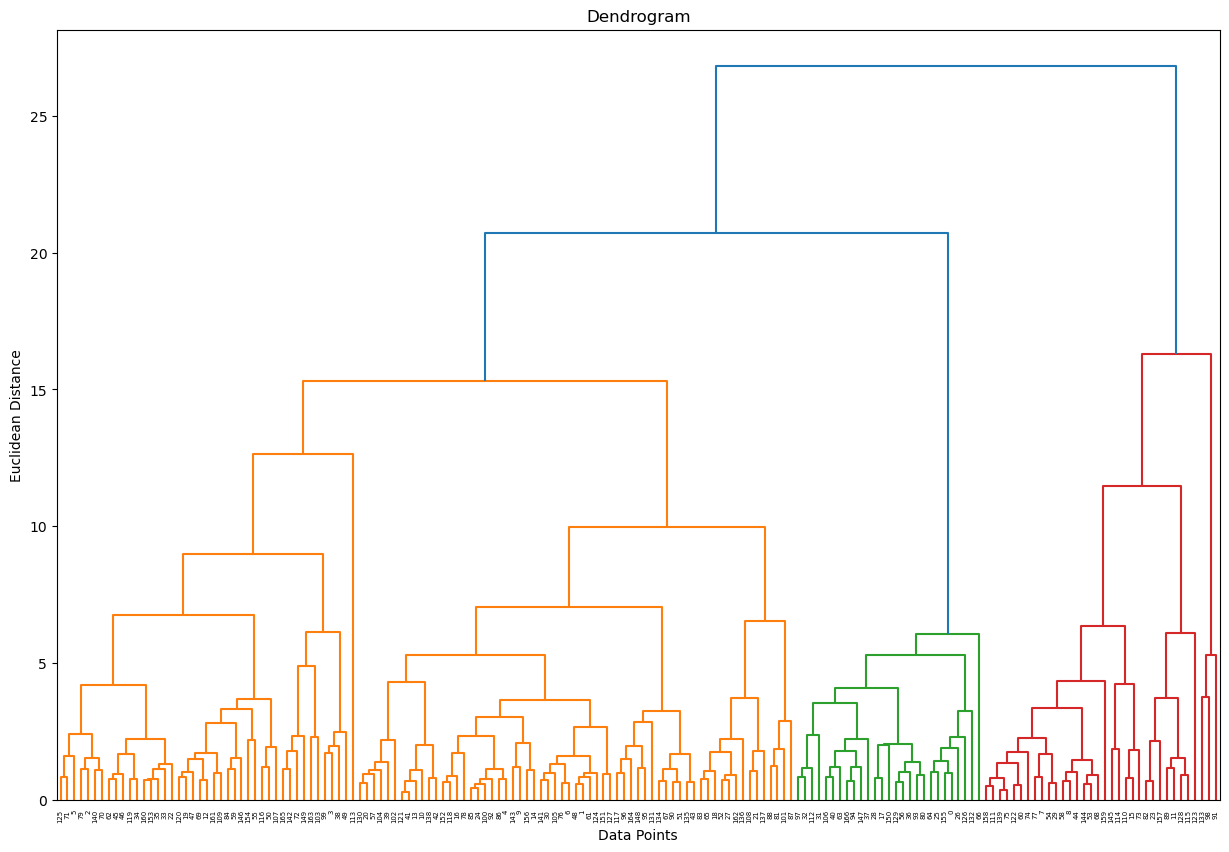

In [203]:
linked = linkage(scaled_data, method='ward')  # 'ward' minimize variance

# Plot dendogram
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

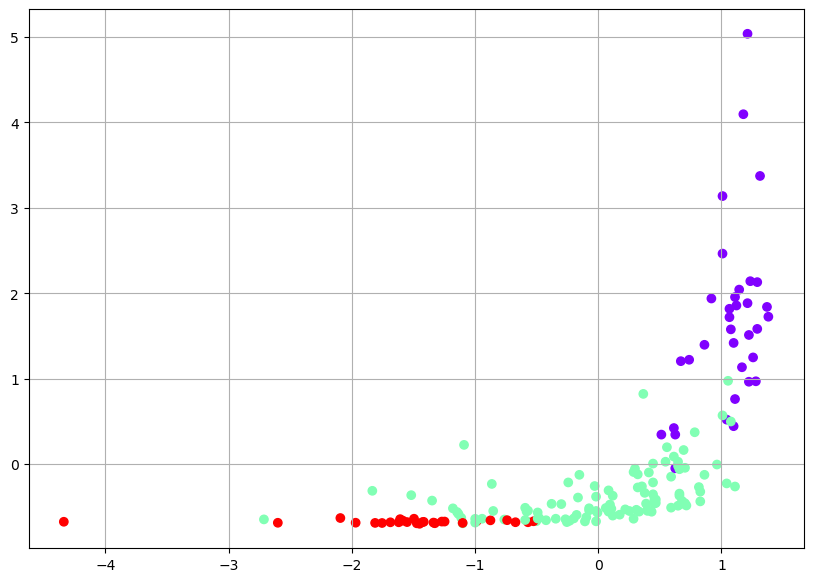

In [204]:
cluster = AgglomerativeClustering(n_clusters=k_cluster, metric='euclidean', linkage='ward')
agglomerative_labels = cluster.fit_predict(scaled_data)
plt.figure(figsize=(10, 7))
plt.scatter(scaled_data[:,6], scaled_data[:,8], c=cluster.labels_, cmap='rainbow')
plt.grid(True)

In [205]:
silhouette_avg = silhouette_score(scaled_data, agglomerative_labels)
print("For n_clusters =", k_cluster,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.24563001303300647


Silhouette Score for K=3: 0.2456


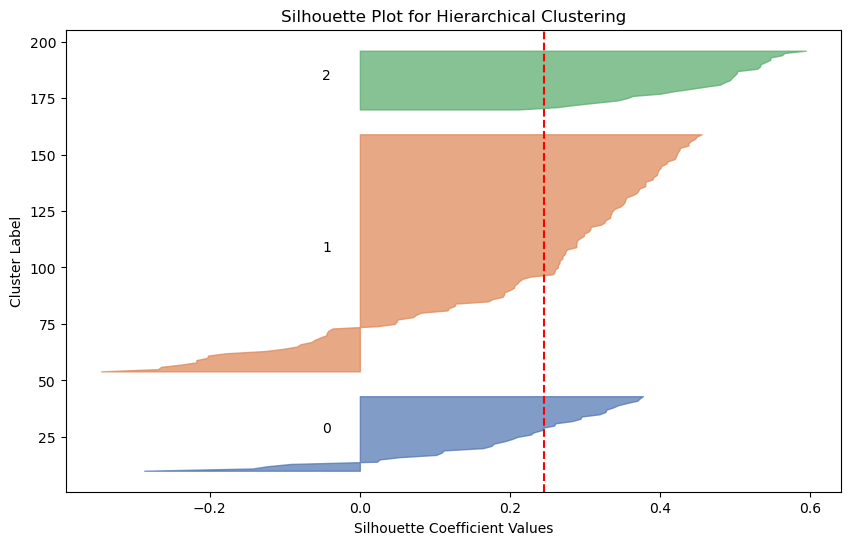

In [206]:
# Calculate Silhouette Score for the optimal K
silhouette_avg = silhouette_score(scaled_data, agglomerative_labels)
print(f'Silhouette Score for K={k_cluster}: {silhouette_avg:.4f}')

# Detailed Silhouette Analysis
sample_silhouette_values = silhouette_samples(scaled_data, agglomerative_labels)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(k_cluster):
    # Aggregate the silhouette scores for samples in cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[agglomerative_labels == i]
    
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = sns.color_palette("deep")[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for Hierarchical Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.show()

<h1> KMedoids
<h4> Using own implementation as it wasn't possible to install scikit-learn-extra on a Mac Arm64

In [207]:
def kmedoids(data, k, max_iter=100):
    """
    Implements the K-medoids clustering algorithm.

    Args:
        data: The dataset as a numpy array.
        k: The number of clusters.
        max_iter: The maximum number of iterations.

    Returns:
        medoids: The indices of the medoids.
        clusters: A list of clusters, where each cluster is a list of data points.
    """

    # Initialize medoids randomly
    medoids = np.random.choice(len(data), k, replace=False)

    for _ in range(max_iter):
        # Assign points to clusters
        clusters = [[] for _ in range(k)]
        for i, point in enumerate(data):
            distances = [np.linalg.norm(point - data[medoid]) for medoid in medoids]
            cluster = np.argmin(distances)
            clusters[cluster].append(i)

        # Update medoids
        for i, cluster in enumerate(clusters):
            if len(cluster) > 0:  # Check if cluster is not empty
                cluster_data = data[cluster]
                costs = [np.sum([np.linalg.norm(cluster_data[j] - cluster_data[p]) for p in range(len(cluster_data))]) for j in range(len(cluster_data))]
                medoids[i] = cluster[np.argmin(costs)]
            else:
                # Handle empty clusters
                print(f"Cluster {i} is empty. Re-initializing medoid.")
                medoids[i] = np.random.choice(len(data), 1)

    return medoids, clusters

In [208]:
medoids, clusters = kmedoids(scaled_data, k_cluster)

# Impressão dos resultados
print("Medoides:", medoids)
print("Clusters:", clusters)

Medoides: [152  59  53]
Clusters: [[1, 2, 4, 5, 6, 9, 11, 13, 14, 16, 18, 19, 20, 22, 24, 27, 30, 33, 34, 35, 39, 41, 43, 45, 46, 48, 51, 52, 57, 61, 62, 65, 67, 71, 76, 78, 79, 83, 85, 86, 89, 90, 92, 95, 96, 98, 100, 101, 102, 104, 105, 115, 117, 118, 119, 120, 121, 124, 125, 127, 128, 130, 131, 133, 134, 138, 140, 141, 143, 148, 151, 152, 153, 154, 156, 160, 162, 164], [0, 3, 12, 17, 21, 25, 26, 28, 31, 32, 36, 37, 38, 40, 47, 49, 50, 55, 56, 59, 63, 64, 66, 69, 70, 72, 80, 81, 84, 87, 88, 93, 94, 97, 99, 103, 106, 107, 108, 109, 112, 113, 116, 126, 129, 132, 136, 137, 142, 146, 147, 149, 150, 155, 161, 163, 165, 166], [7, 8, 10, 15, 23, 29, 42, 44, 53, 54, 58, 60, 68, 73, 74, 75, 77, 82, 91, 110, 111, 114, 122, 123, 135, 139, 144, 145, 157, 158, 159]]


In [209]:
# Get country closest to medoid
def closest_to_medoid(data, clusters, df):
    closest_countries = []
    
    for cluster in clusters:
        cluster_data = data[cluster]

        centroid = np.mean(cluster_data, axis=0)

        distances = [np.linalg.norm(point - centroid) for point in cluster_data]

        closest_idx = cluster[np.argmin(distances)]

        closest_country_row = df.iloc[closest_idx]

        closest_countries.append(closest_country_row)
    
    return closest_countries

closest_countries_rows = closest_to_medoid(scaled_data, clusters, df)

for i, row in enumerate(closest_countries_rows):
    print(f"\nCluster {i} - Country closest to medoid:")
    print(f"{row['country']}")


Cluster 0 - Country closest to medoid:
Tunisia

Cluster 1 - Country closest to medoid:
Ghana

Cluster 2 - Country closest to medoid:
Sweden


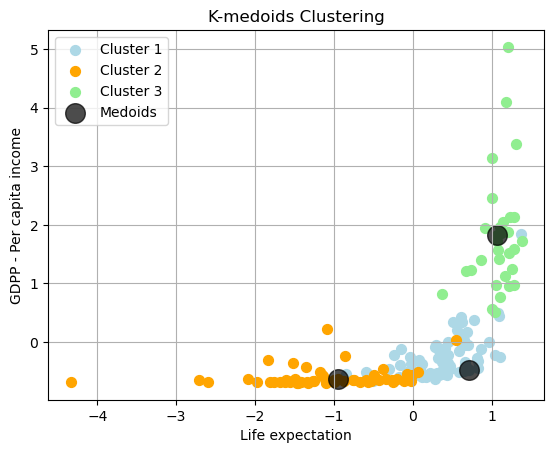

In [210]:
color_map = {0: 'lightblue', 1: 'orange', 2: 'lightgreen'}

# Plot each cluster with a specific color and label
for i, cluster in enumerate(clusters):
    cluster_data = scaled_data[cluster]
    plt.scatter(cluster_data[:, 6], cluster_data[:, 8],
                color=color_map[i % len(color_map)], s=50, label=f'Cluster {i+1}')

plt.title("K-medoids Clustering")
plt.xlabel('Life expectation')
plt.ylabel('GDPP - Per capita income')

# Plot centroids
plt.scatter(scaled_data[medoids, 6], scaled_data[medoids, 8], c='black', s=200, alpha=0.7, label='Medoids')

# Display the legend
plt.legend()
plt.grid(True)
plt.show()

<h1> DBSCAN

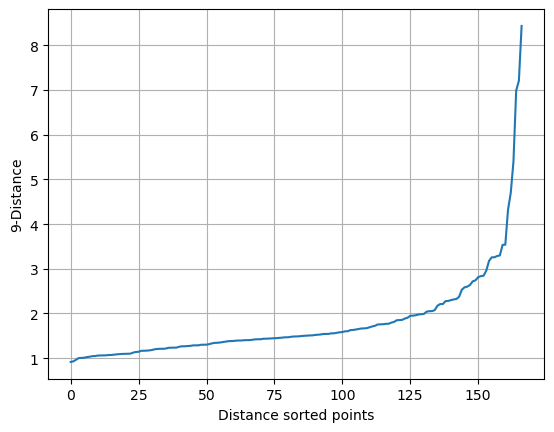

In [211]:
# Find best eps distance for DBSCAN
# initialize the value of k for kNN which can be same as MinPts
k = 9

# Compute k-nearest neighbors
# you need to add 1 to k as this function also return 
# distance to itself (first column is zero)
nbrs = NearestNeighbors(n_neighbors=k+1).fit(scaled_data)

# get distances
dist, ind = nbrs.kneighbors(scaled_data)
k_dist = np.sort(dist[:, -1])

plt.plot(k_dist)
plt.xlabel('Distance sorted points')
plt.ylabel(f'{k}-Distance')
plt.grid(True)
plt.show()

In [212]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.35, min_samples=9).fit(scaled_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

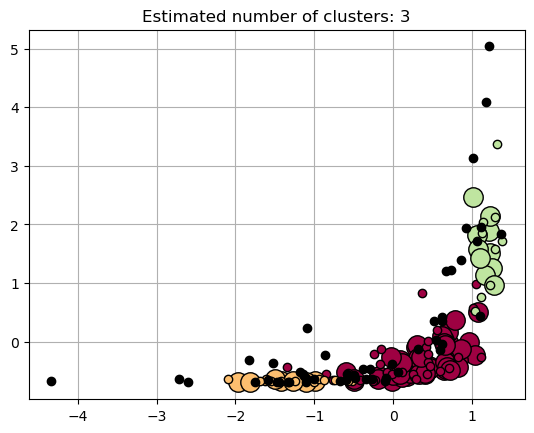

In [213]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = scaled_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 6], xy[:, 8], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = scaled_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 6], xy[:, 8], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.grid(True)
plt.show()

In [214]:
silhouette_avg = silhouette_score(scaled_data, labels)
print("For n_clusters =", n_clusters_,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.15046229501686828
